# Explore here

In [1]:
# Your code here
import pandas as pd

In [2]:
# PASO 1
# Cargar conjuntos de datos y definir df

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
#Almacenar los datos en crudo en la carpeta 

df.to_csv('../data/raw/df.csv')

In [4]:
# Paso 2 : EDA

# Obtener las dimensiones

df.shape

(48895, 16)

In [5]:
# Obtener información sobre tipos de datos y valores no nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Podemos ver que tenemos 48895 entradas (filas) y 16 columnas.
# Hay algunas columnas que le faltan datos a las columnas 1,3,12,13.
# También nos indica el tipo de dato que es (int64, object, float64)

In [7]:
# Revisar si hay duplicados

df.duplicated().sum()

# No hay columnas duplicadas
# Ahora hay que revisar si los id están duplicados

print(df['id'].duplicated().sum())

#No hay duplicados de Id, son puros registros únicos

0


In [8]:
# Eliminar información irrelevante
# Pregunta de rigor = ¿son todas las características imprescindibles para realizar una predicción?
# last review no es relevante, ya que es ocasional no nos ayuda a la predicción
# reviews_per_month: tiene más de 10.000 null y tengo más columnas para predecir
# host_name: tengo el host_id
# name: no me influye en predecir el nombre

columnas_eliminar=['last_review','reviews_per_month','id','host_name','name']
df.drop(columnas_eliminar,axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


In [10]:
df.drop(['id'],axis=1,inplace=True)

df.info()

KeyError: "['id'] not found in axis"

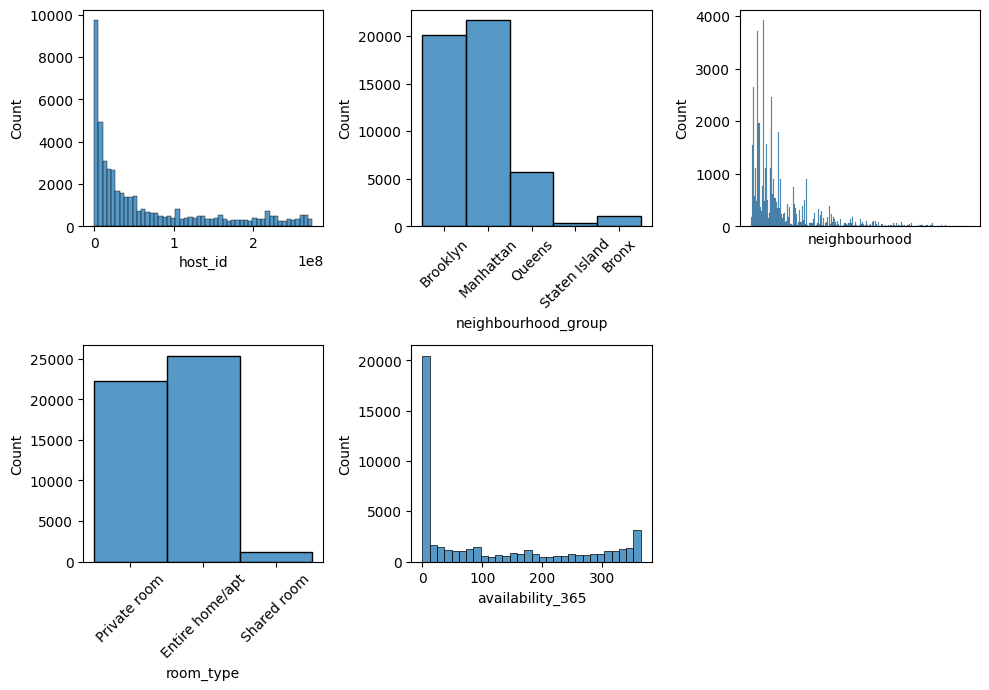

In [12]:
# Analisis univarientes
# Analisis Variables categoricas. Una variable categórica es un tipo de variable que puede tomar uno de un número limitado de categorías o grupos
# Hay que usar Histograma e identificar cuales son categoricas
# host_id al ser un número no lo puedo ordenar. Es ideferente si un host_id va primero que otro.
# Categórica : host_id, neighbourhood_group, neighbourhood, room_type, availability_365
# Numérica: latitude, longitude, price, calculated_host_listings_count, availability_365, minimum_nights
# Duda Categorica/numerica = availability_365, minimum_nights

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.histplot(ax= axis[0,0], data = df, x='host_id')
sns.histplot(ax= axis[0,1], data = df, x='neighbourhood_group').tick_params(axis='x', rotation=45)
sns.histplot(ax= axis[0,2], data = df, x='neighbourhood').set_xticks([])
sns.histplot(ax= axis[1,0], data = df, x='room_type').tick_params(axis='x', rotation=45)
sns.histplot(ax= axis[1,1], data = df, x='availability_365')
fig.delaxes(axis[1,2])

# Ajustar el layout
plt.tight_layout()

plt.show()



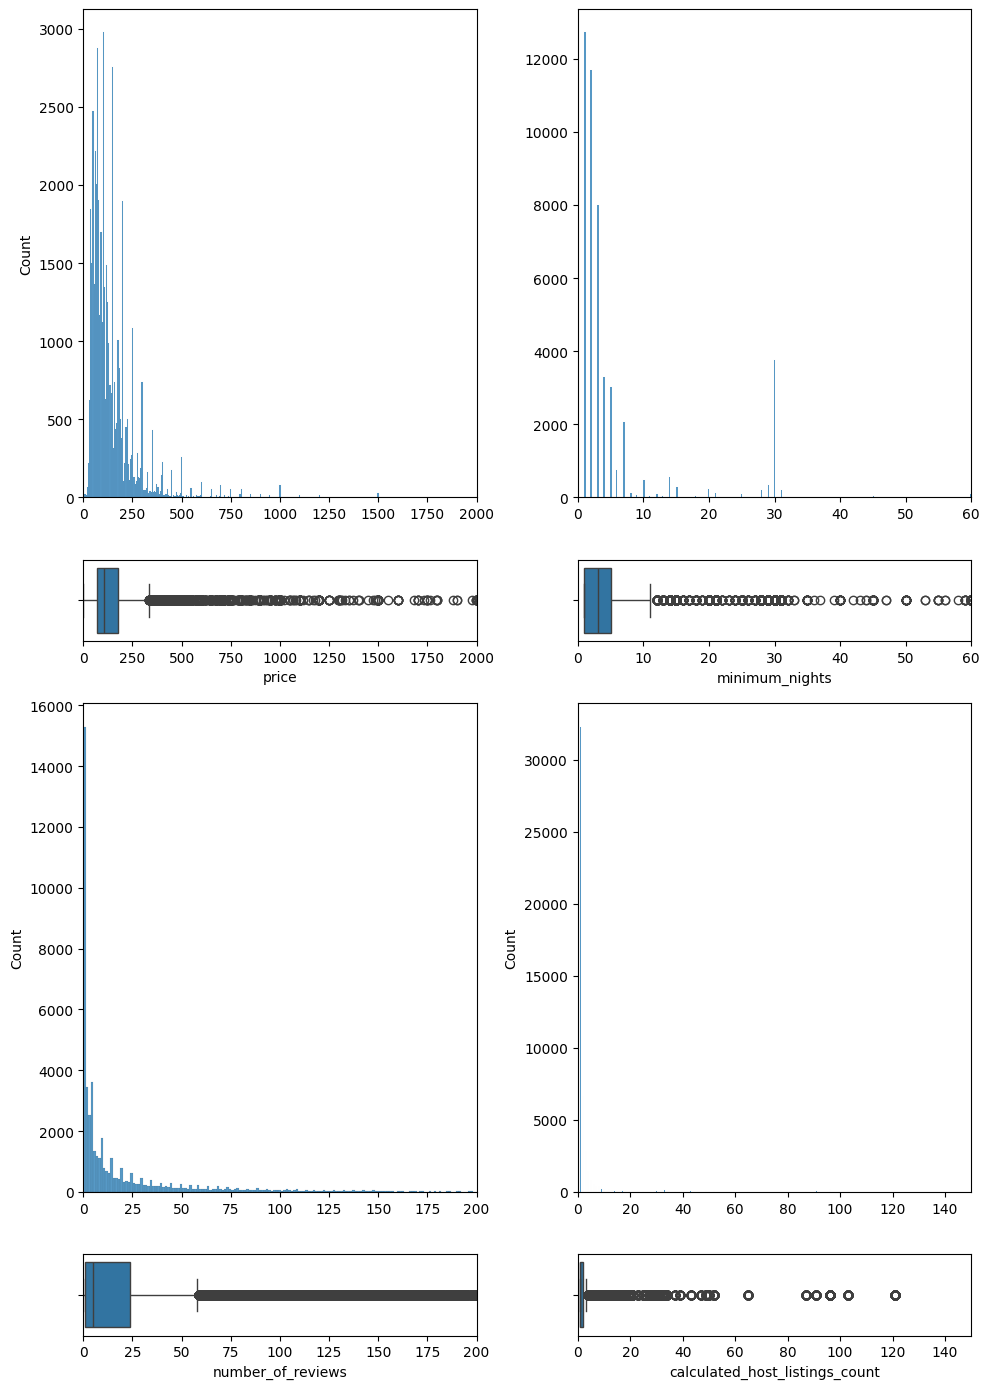

In [13]:
# Analisis Númerica
# Numérica: price, minimum_nights, calculated_host_listings_count

fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja

sns.histplot(ax = axis[0, 0], data = df, x = "price").set(xlabel = None)
axis[0, 0].set_xlim(0, 2000)
sns.boxplot(ax = axis[1, 0], data = df, x = "price")
axis[1, 0].set_xlim(0, 2000)

sns.histplot(ax = axis[0, 1], data = df, x = "minimum_nights").set(xlabel = None, ylabel = None)
axis[0, 1].set_xlim(0, 60)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")
axis[1, 1].set_xlim(0, 60)

sns.histplot(ax = axis[2, 0], data = df, x = "number_of_reviews").set(xlabel = None)
axis[2, 0].set_xlim(0, 200)
sns.boxplot(ax = axis[3, 0], data = df, x = "number_of_reviews")
axis[3, 0].set_xlim(0, 200)

sns.histplot(ax = axis[2, 1], data = df, x = "calculated_host_listings_count").set(xlabel = None)
axis[2,1].set_xlim(0, 150)
sns.boxplot(ax = axis[3, 1], data = df, x = "calculated_host_listings_count")
axis[3,1].set_xlim(0, 150)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


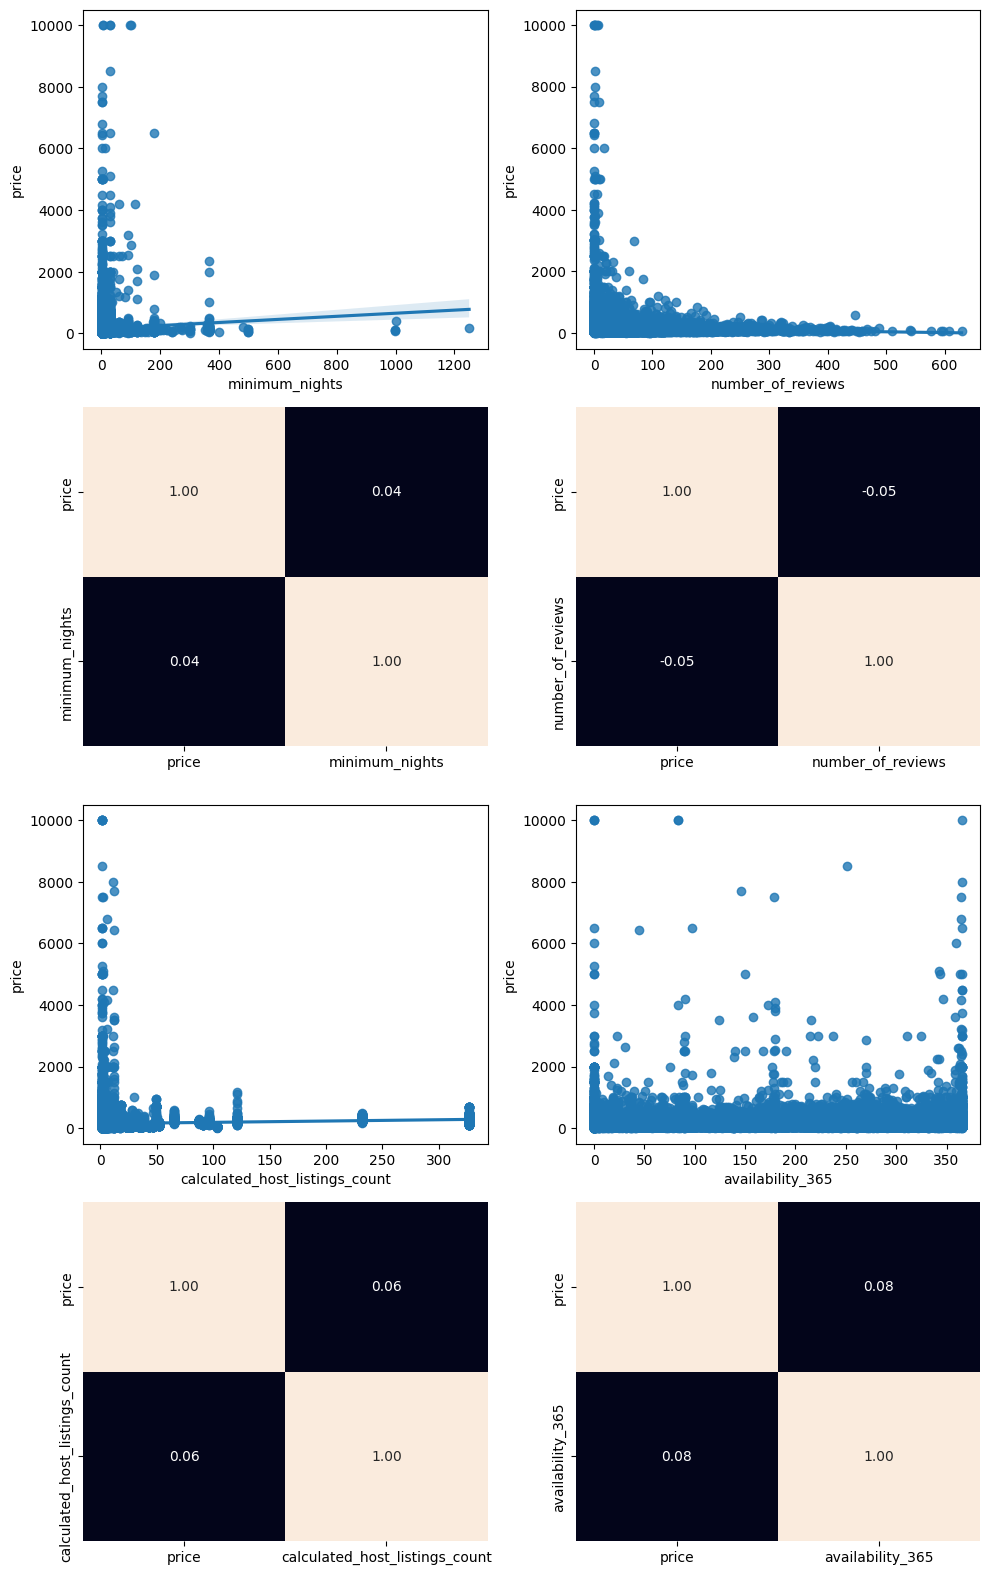

In [27]:
# Análisis numérico - númerico

# Analizar price - minimum_nights, number_

fig, axis = plt.subplots(4,2, figsize = (10,16))

sns.regplot(ax= axis [0,0], data = df, x="minimum_nights", y="price")
sns.heatmap(df[["price", "minimum_nights"]].corr(),annot= True, fmt='.2f', ax = axis[1, 0],cbar=False)

sns.regplot(ax= axis [0,1], data = df, x="number_of_reviews", y="price")
sns.heatmap(df[["price", "number_of_reviews"]].corr(),annot= True, fmt='.2f', ax = axis[1, 1],cbar=False)

sns.regplot(ax= axis [2,0], data = df, x="calculated_host_listings_count", y="price")
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(),annot= True, fmt='.2f', ax = axis[3, 0],cbar=False)

sns.regplot(ax= axis [2,1], data = df, x="availability_365", y="price")
sns.heatmap(df[["price", "availability_365"]].corr(),annot= True, fmt='.2f', ax = axis[3, 1],cbar=False)



plt.tight_layout()
plt.show()





In [ ]:
# ninguna de estas variables por si solas son capaces de explicar el precio, ya que no tienen correlación. 
# Estas variables por si solas no son buenos predictores del precio.